In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Pandas\data\health_data.csv")

In [3]:
df.head()

,weight,height,gender
0,65.6,174.0,1
1,71.8,175.3,1
2,80.7,193.5,1
3,72.6,186.5,1
4,78.8,187.2,1


In [4]:
model_one_var = LinearRegression()
df_1 = df.copy()
model_one_var.fit(df_1[['weight']], df[['height']])
print(f"Intercept: {model_one_var.intercept_}, Coefficient: {model_one_var.coef_}")

Intercept: [136.1818561], Coefficient: [[0.50561356]]


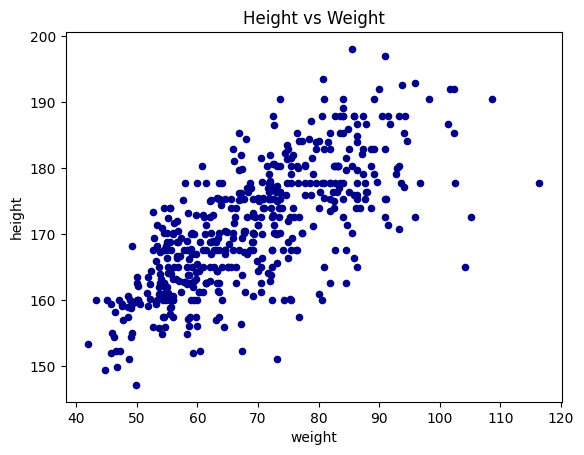

In [5]:
ax = df_1.plot.scatter(x='weight', y='height', title='Height vs Weight', color='DarkBlue')


In [6]:
a = model_one_var.coef_[0][0]
b = model_one_var.intercept_[0]

df_1['predicted_height'] = df_1['weight'].apply(lambda x: a*x + b)

df

,weight,height,gender
0,65.6,174.0,1
1,71.8,175.3,1
2,80.7,193.5,1
3,72.6,186.5,1
4,78.8,187.2,1
...,...,...,...
502,71.8,176.5,0
503,55.5,164.4,0
504,48.6,160.7,0
505,66.4,174.0,0


-2.421731454424957e-14

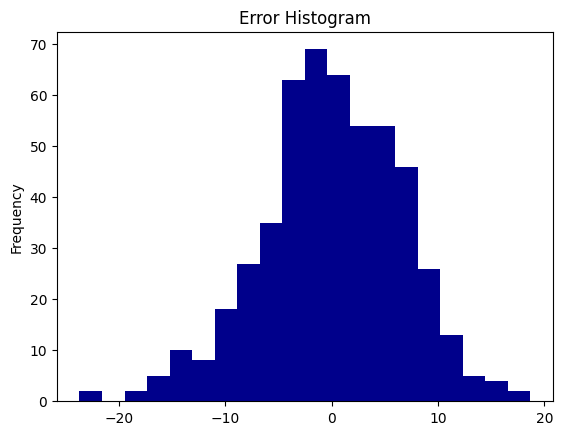

In [7]:
error_one_var = df_1['height'] - df_1['predicted_height']
error_one_var.plot.hist(title='Error Histogram', color='DarkBlue', bins=20)
error_one_var.mean()

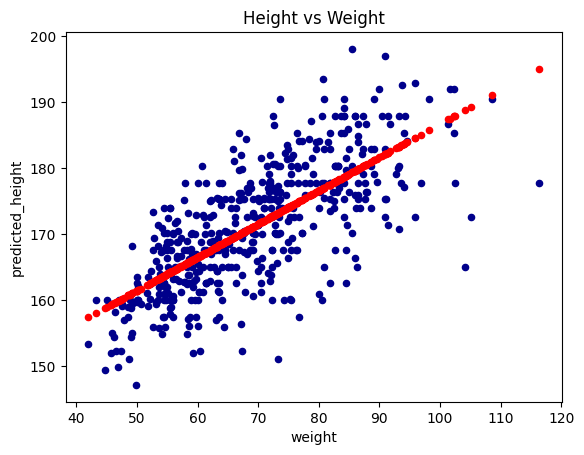

In [8]:
ax = df_1.plot.scatter(x='weight', y='height', title='Height vs Weight', color='DarkBlue')
ax = df_1.plot.scatter(x='weight', y='predicted_height', color='Red', ax=ax)

In [9]:
model_two_vars = LinearRegression()
df_2 = df.copy()
model_two_vars.fit(df_2[['weight', 'gender']], df[['height']])
a = model_two_vars.coef_[0][0]
c = model_two_vars.coef_[0][1]
b = model_two_vars.intercept_[0]
print(f"Intercept: {b}, Coefficient_a: {a}, Coefficient_c: {c}")

Intercept: 144.77275730055874, Coefficient_a: 0.3316736439762843, Coefficient_c: 7.05410434342085


In [10]:
df_2['predicted_height'] = df_2.apply(lambda x: a*x['weight'] + c*x['gender'] + b, axis=1)
df_2

,weight,height,gender,predicted_height
0,65.6,174.0,1,173.584653
1,71.8,175.3,1,175.641029
2,80.7,193.5,1,178.592925
3,72.6,186.5,1,175.906368
4,78.8,187.2,1,177.962745
...,...,...,...,...
502,71.8,176.5,0,168.586925
503,55.5,164.4,0,163.180645
504,48.6,160.7,0,160.892096
505,66.4,174.0,0,166.795887


-1.8387220302115412e-14

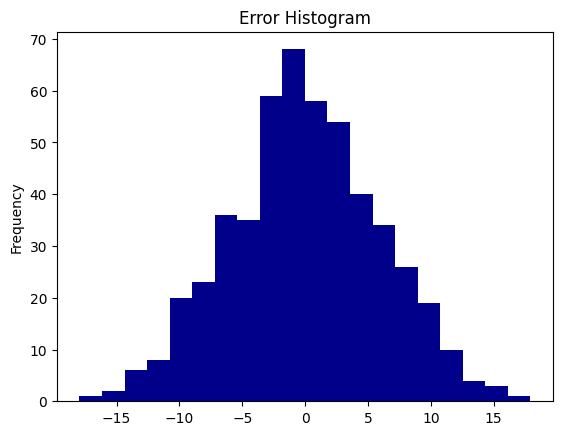

In [11]:
error_two_vars = df_2['height'] - df_2['predicted_height']
error_two_vars.plot.hist(title='Error Histogram', color='DarkBlue', bins=20)
error_two_vars.mean()

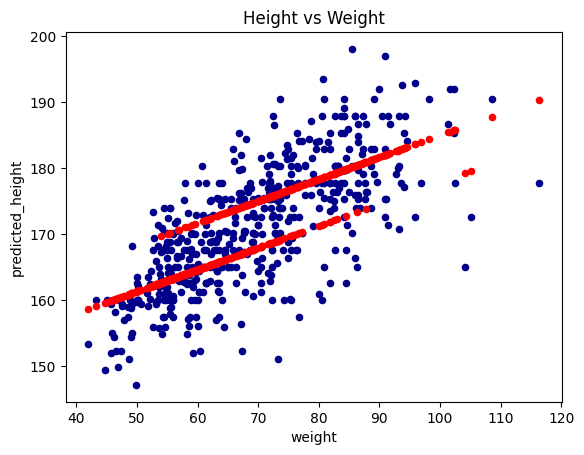

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

ax = df_2.plot.scatter(x='weight', y='height', title='Height vs Weight', color='DarkBlue')
ax = df_2.plot.scatter(x='weight', y='predicted_height', color='Red', ax=ax)

C:\Users\jorda\AppData\Local\Temp\ipykernel_12636\2739208274.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(xs=y, ys=x, zs=z_1, s=50, marker='o', alpha=0.5, cmap='CMRmap')
C:\Users\jorda\AppData\Local\Temp\ipykernel_12636\2739208274.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(xs=y, ys=x, zs=z_2, s=50, marker='^', alpha=0.5, cmap='Greys')


Text(0.5, 0.92, 'Actual vs Predicted Height')

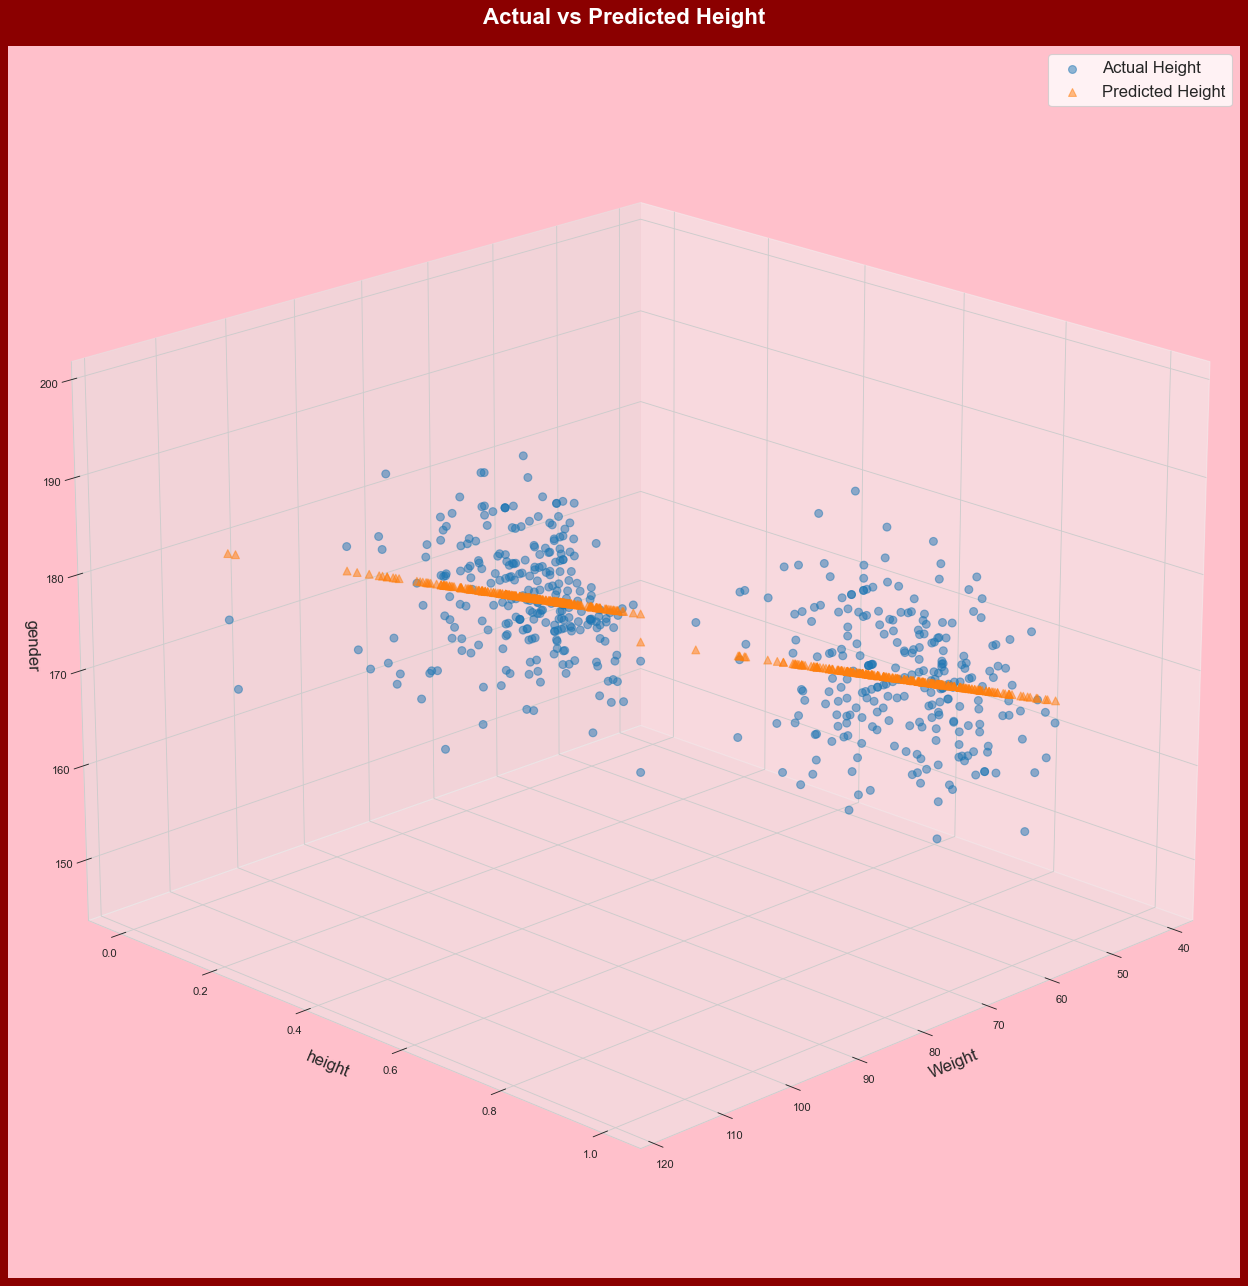

In [13]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(20, 20), dpi= 80, facecolor='DarkRed', edgecolor='w')
ax = plt.axes(projection='3d', elev=20, azim=45, facecolor='Pink', alpha=0.7)


x = df_2['gender']
y = df_2['weight']
z_1 = df_2['height']
z_2 = df_2['predicted_height']

ax.scatter3D(xs=y, ys=x, zs=z_1, s=50, marker='o', alpha=0.5, cmap='CMRmap')
ax.scatter3D(xs=y, ys=x, zs=z_2, s=50, marker='^', alpha=0.5, cmap='Greys')
ax.set_xlabel('Weight', fontsize=15)
ax.set_ylabel('height', fontsize=15)
ax.set_zlabel('gender', fontsize=15)
ax.autoscale()
ax.legend(['Actual Height', 'Predicted Height'], fontsize=15)
ax.set_title('Actual vs Predicted Height', fontsize=20, fontweight='bold', pad=20, color='white')

C:\Users\jorda\AppData\Local\Temp\ipykernel_12636\313164646.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter3D(x, y, z, s=50, cmap='Greens')


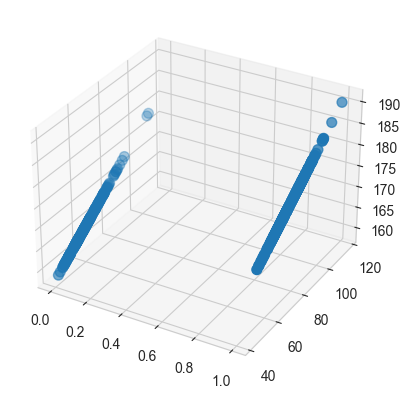

In [15]:
ax2 = plt.axes(projection='3d')

x = df_2['gender']
y = df_2['weight']
z = df_2['predicted_height']

ax2.scatter3D(x, y, z, s=50, cmap='Greens')

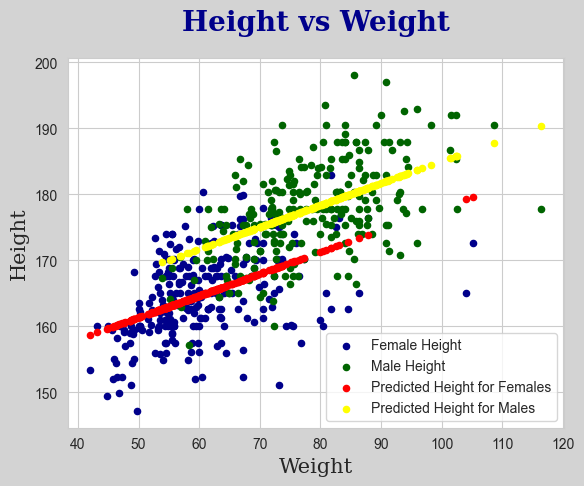

In [ ]:
sns.set_style("whitegrid")

ax = df_2[df['gender'] == 0].plot.scatter(x='weight', y='height', title='Height vs Weight', color='Darkblue', label='Female Height')
ax = df_2[df['gender'] == 1].plot.scatter(x='weight', y='height', title='Height vs Weight', color='DarkGreen', ax=ax, label='Male Height')
ax = df_2[df['gender'] == 0].plot.scatter(x='weight', y='predicted_height', color='Red', ax=ax, label='Predicted Height for Females')
ax = df_2[df['gender'] == 1].plot.scatter(x='weight', y='predicted_height', color='Yellow', ax=ax, label='Predicted Height for Males')
ax.set_xlabel('Weight', fontfamily='serif', fontsize=15)
ax.set_ylabel('Height', fontfamily='serif', fontsize=15)
ax.set_title('Height vs Weight', fontsize=20, fontweight='bold', pad=20, color='DarkBlue', fontfamily='serif')
ax.figure.set_facecolor('lightgrey')
